In [1]:

!pip install pyportfolioopt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.9/61.9 kB 755.5 kB/s eta 0:00:00


In [2]:
import yfinance as yf
import pandas as pd

In [3]:
# Getting dataframes info for Stocks using yfinance
aapl_df = yf.download('AAPL', start = '2010-01-01', end = '2024-02-11')
tsla_df = yf.download('TSLA', start = '2010-01-01', end = '2024-02-11')
gog_df = yf.download('GOOG', start = '2010-01-01', end = '2024-02-11')
amzn_df = yf.download('AMZN', start = '2010-01-01', end = '2024-02-11')
msft_df = yf.download('MSFT', start = '2010-01-01', end = '2024-02-11')
meta_df = yf.download('META', start = '2010-01-01', end = '2024-02-11')
nvdia_df = yf.download('NVDA', start = '2010-01-01', end = '2024-02-11')

int_df = yf.download('INTC', start = '2010-01-01', end = '2024-02-11')
brk_df = yf.download('BRK-B', start = '2010-01-01', end = '2024-02-11')
unh_df = yf.download('UNH', start = '2010-01-01', end = '2024-02-11')

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [4]:
aapl_df = aapl_df['Adj Close']
tsla_df = tsla_df['Adj Close']
gog_df = gog_df['Adj Close']
amzn_df = amzn_df['Adj Close']
msft_df = msft_df['Adj Close']
meta_df = meta_df['Adj Close']
nvdia_df = nvdia_df['Adj Close']

int_df = int_df['Adj Close']
brk_df = brk_df['Adj Close']
unh_df = unh_df['Adj Close']
# intel

In [5]:
df = pd.concat([aapl_df, tsla_df, gog_df, amzn_df,msft_df,meta_df,nvdia_df,int_df,brk_df,unh_df], join = 'outer', axis = 1)
df.columns = ['aapl', 'tsla', 'gog', 'amzn','msft','meta','nvdia','int','brk','unh']
df # Visualizing dataframe for input

aapl        tsla         gog        amzn        msft  \
Date                                                                     
2010-01-04    6.470742         NaN   15.610239    6.695000   23.431583   
2010-01-05    6.481928         NaN   15.541497    6.734500   23.439163   
2010-01-06    6.378825         NaN   15.149715    6.612500   23.295309   
2010-01-07    6.367032         NaN   14.797037    6.500000   23.053055   
2010-01-08    6.409362         NaN   14.994298    6.676000   23.212042   
...                ...         ...         ...         ...         ...   
2024-02-05  187.440811  181.059998  144.929993  170.309998  404.901245   
2024-02-06  189.058762  185.100006  145.410004  169.149994  404.741516   
2024-02-07  189.168625  187.580002  146.679993  170.529999  413.285706   
2024-02-08  188.080017  189.559998  147.220001  169.839996  413.345612   
2024-02-09  188.850006  193.570007  150.220001  174.449997  419.773712   

                  meta       nvdia        int         brk         unh  
Date                                                                   
2010-01-04         NaN    4.240230  13.660450   66.220001   25.497292  
2010-01-05         NaN    4.302149  13.653906   66.540001   25.456854  
2010-01-06         NaN    4.329667  13.608111   66.199997   25.707535  
2010-01-07         NaN    4.244816  13.477262   66.459999   26.694111  
2010-01-08         NaN    4.253988  13.627736   66.440002   26.443434  
...                ...         ...        ...         ...         ...  
2024-02-05  458.923065  693.287476  42.645000  390.760010  500.985046  
2024-02-06  454.238037  682.197998  42.740002  393.739990  508.664795  
2024-02-07  469.092285  700.957092  42.779999  397.660004  517.350586  
2024-02-08  469.501862  696.377319  42.500000  397.489990  518.047852  
2024-02-09  467.613831  721.296204  43.310001  398.359985  516.185120  

[3550 rows x 10 columns]

In [6]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

In [7]:
mu = expected_returns.mean_historical_return(df)
S = risk_models.sample_cov(df)

In [8]:
mu

aapl     0.270677
tsla     0.423301
gog      0.174415
amzn     0.260488
msft     0.227398
meta     0.238615
nvdia    0.440107
int      0.085382
brk      0.135884
unh      0.238100
dtype: float64

In [9]:
S

aapl      tsla       gog      amzn      msft      meta     nvdia  \
aapl   0.079264  0.056778  0.042914  0.045036  0.043204  0.049555  0.063301   
tsla   0.056778  0.323128  0.051436  0.065661  0.051665  0.064715  0.094190   
gog    0.042914  0.051436  0.074707  0.054209  0.045372  0.059459  0.062430   
amzn   0.045036  0.065661  0.054209  0.109064  0.048357  0.065919  0.068778   
msft   0.043204  0.051665  0.045372  0.048357  0.066972  0.050062  0.066250   
meta   0.049555  0.064715  0.059459  0.065919  0.050062  0.163630  0.075203   
nvdia  0.063301  0.094190  0.062430  0.068778  0.066250  0.075203  0.201127   
int    0.041688  0.050748  0.038625  0.039557  0.045069  0.046119  0.068776   
brk    0.026219  0.029004  0.026457  0.025157  0.026733  0.025486  0.036289   
unh    0.027549  0.029633  0.025771  0.024684  0.028407  0.023133  0.034803   

            int       brk       unh  
aapl   0.041688  0.026219  0.027549  
tsla   0.050748  0.029004  0.029633  
gog    0.038625  0.026457  0.025771  
amzn   0.039557  0.025157  0.024684  
msft   0.045069  0.026733  0.028407  
meta   0.046119  0.025486  0.023133  
nvdia  0.068776  0.036289  0.034803  
int    0.092393  0.029483  0.026138  
brk    0.029483  0.038869  0.025681  
unh    0.026138  0.025681  0.063754

In [10]:
ef = EfficientFrontier(mu, S)

In [11]:
ef

In [12]:
weights = ef.max_sharpe()

In [13]:
clean_weights = ef.clean_weights()

In [14]:
clean_weights

OrderedDict([('aapl', 0.21433),
             ('tsla', 0.10011),
             ('gog', 0.0),
             ('amzn', 0.06883),
             ('msft', 0.0),
             ('meta', 0.0),
             ('nvdia', 0.21118),
             ('int', 0.0),
             ('brk', 0.0),
             ('unh', 0.40554)])

In [15]:
daily_returns = df.pct_change()


In [16]:
new_weights = {'aapl': 0.21433, 'tsla': 0.10011, 'gog': 0.0, 'amzn': 0.11134, 'msft': 0.0, 'meta': 0.0, 'nvdia':  0.21118, 'int': 0.0, 'brk': 0.0, 'unh': 0.40554}

In [17]:
weighted_daily_returns = daily_returns.mul(list(new_weights.values()), axis=1)
optimized_portfolio = weighted_daily_returns.sum(axis=1)


In [18]:
optimized_portfolio

Date
2010-01-04    0.000000
2010-01-05    0.003468
2010-01-06   -0.000082
2010-01-07    0.009134
2010-01-08    0.001088
                ...   
2024-02-05    0.001836
2024-02-06    0.006164
2024-02-07    0.015106
2024-02-08   -0.001460
2024-02-09    0.012116
Length: 3550, dtype: float64

In [19]:
equal_weights = [1/len(df.columns)] * len(df.columns)
equal_weighted_daily_returns = daily_returns.mul(equal_weights, axis=1).sum(axis=1)


{'TSLA': 0.10376876116947087,
 'AAPL': 0.10980934632857162,
 'GOOG': 0.0012097300627106895,
 'AMZN': 0.0845066187089395,
 'MSFT': 0.1521652422735038,
 'META': 0.02616867958507472,
 'NVDA': 0.17380649361920766,
 'INTC': 0.0003446720244372224,
 'BRK-B': 0.002488874352998135,
 'UNH': 0.34573158187508574}

0.2078390105165644

 population_size=1000, num_generations=90, mutation_rate=0.10

In [20]:
normal1_weights = {'aapl': 0.10980934632857162, 'tsla': 0.10376876116947087, 'gog':  0.0012097300627106895, 'amzn':0.0845066187089395, 'msft': 0.1521652422735038, 'meta':  0.02616867958507472,
               'nvdia': 0.17380649361920766,'int': 0.0003446720244372224,'brk': 0.002488874352998135,'unh':  0.34573158187508574}

In [21]:
normal1_weighted_daily_returns = daily_returns.mul(list(normal1_weights.values()), axis=1)

In [22]:
normal1_optimized_portfolio = normal1_weighted_daily_returns.sum(axis=1)

{'TSLA': 0.10356426764754874,
 'AAPL': 0.11538444114474458,
 'GOOG': 0.003049137891361191,
 'AMZN': 0.08146606182656453,
 'MSFT': 0.1515955560634761,
 'META': 0.02266304049292984,
 'NVDA': 0.17201510034697592,
 'INTC': 0.000739207243753136,
 'BRK-B': 0.0017702463030386472,
 'UNH': 0.34844598149827155}

0.20766614476716014

 population_size=1000, num_generations=90, elite_size=50, mutation_rate=0.01

In [23]:
elite1_weights = {'aapl':0.11538444114474458, 'tsla': 0.10356426764754874, 'gog': 0.003049137891361191, 'amzn': 0.08146606182656453,
               'msft': 0.1515955560634761, 'meta':0.02266304049292984, 'nvdia':  0.17201510034697592, 'int': 0.000739207243753136,
               'brk': 0.0017702463030386472, 'unh': 0.34844598149827155}

In [24]:
elite1_weighted_daily_returns = daily_returns.mul(list(elite1_weights.values()), axis=1)

In [25]:
elite1_optimized_portfolio = elite1_weighted_daily_returns.sum(axis=1)

{'TSLA': 0.10590247437919828,
 'AAPL': 0.1170785807677485,
 'GOOG': 0.0,
 'AMZN': 0.09098192285171586,
 'MSFT': 0.1701814490229514,
 'META': 0.030175042153877656,
 'NVDA': 0.18967961551760432,
 'INTC': 0.0,
 'BRK-B': 0.0014047350354394182,
 'UNH': 0.4020337993290901}

0.22816458030219272

 population_size=1000, num_generations=90, mutation_rate=0.20

In [26]:
mutation1_weights = {'aapl': 0.1170785807677485, 'tsla': 0.10590247437919828, 'gog': 0.0, 'amzn': 0.09098192285171586,
               'msft': 0.1701814490229514, 'meta': 0.030175042153877656, 'nvdia':  0.18967961551760432,
               'int': 0.0, 'brk': 0.0014047350354394182, 'unh': 0.4020337993290901}

In [27]:
mutation1_weighted_daily_returns = daily_returns.mul(list(mutation1_weights.values()), axis=1)

In [28]:
mutation1_optimized_portfolio = mutation1_weighted_daily_returns.sum(axis=1)

{'TSLA': 0.12979902206077037,
 'AAPL': 0.1558702257566565,
 'GOOG': 0.0077830000561032245,
 'AMZN': 0.11114708995369142,
 'MSFT': 0.19773030519831672,
 'META': 0.027546944128382746,
 'NVDA': 0.20308323653148994,
 'INTC': 0.0022630123609782863,
 'BRK-B': 0.00012065156008723277,
 'UNH': 0.4460914154147217}

0.2632783364770521

,200,50,0.05 normal


In [29]:
normal2_weights = {'aapl': 0.1558702257566565, 'tsla': 0.12979902206077037, 'gog': 0.0077830000561032245, 'amzn':0.11114708995369142, 'msft': 0.19773030519831672,
               'meta': 0.027546944128382746, 'nvdia':  0.20308323653148994,
               'int': 0.0022630123609782863, 'brk': 0.00012065156008723277, 'unh': 0.4460914154147217}

In [30]:
normal2_weighted_daily_returns = daily_returns.mul(list(normal2_weights.values()), axis=1)

In [31]:
normal2_optimized_portfolio = normal2_weighted_daily_returns.sum(axis=1)

{'TSLA': 0.092792976401013,
 'AAPL': 0.12672783958490916,
 'GOOG': 0.0,
 'AMZN': 0.06277433020892464,
 'MSFT': 0.15713522803327254,
 'META': 0.014612437225157518,
 'NVDA': 0.18600965010271964,
 'INTC': 0.0,
 'BRK-B': 0.0,
 'UNH': 0.3491140809940232}

0.20593271221028242

,200,50,0.25

In [32]:
mutation2_weights = {'aapl': 0.12672783958490916, 'tsla': 0.092792976401013, 'gog': 0.0, 'amzn': 0.06277433020892464, 'msft': 0.15713522803327254, 'meta':0.014612437225157518,
               'nvdia':  0.18600965010271964, 'int': 0.0,
               'brk': 0.0, 'unh': 0.3491140809940232}

In [33]:
mutation2_weighted_daily_returns = daily_returns.mul(list(mutation2_weights.values()), axis=1)

In [34]:
mutation2_optimized_portfolio = mutation2_weighted_daily_returns.sum(axis=1)

{'TSLA': 0.12979902206077037,
 'AAPL': 0.1558702257566565,
 'GOOG': 0.0077830000561032245,
 'AMZN': 0.11114708995369142,
 'MSFT': 0.19773030519831672,
 'META': 0.027546944128382746,
 'NVDA': 0.20308323653148994,
 'INTC': 0.0022630123609782863,
 'BRK-B': 0.00012065156008723277,
 'UNH': 0.4460914154147217}

0.2632783364770521

,200,50,0.25

In [35]:
elite2_weights = {'aapl':0.1558702257566565, 'tsla': 0.12979902206077037, 'gog': 0.0077830000561032245, 'amzn':  0.11114708995369142,
               'msft': 0.19773030519831672, 'meta':  0.027546944128382746, 'nvdia':  0.20308323653148994,
               'int': 0.0022630123609782863, 'brk': 0.00012065156008723277, 'unh':  0.4460914154147217}

In [36]:
elite2_weighted_daily_returns = daily_returns.mul(list(elite2_weights.values()), axis=1)

In [37]:
elite2_optimized_portfolio = elite2_weighted_daily_returns.sum(axis=1)

In [38]:
!pip install quantstats

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 1.1 MB/s eta 0:00:00


In [39]:
import quantstats as qs

In [40]:
#qs.reports.full(optimized_portfolio, benchmark=equal_weighted_daily_returns)


[Performance Metrics]

                           Benchmark    Strategy
-------------------------  -----------  ----------
Start Period               2010-01-05   2010-01-05
End Period                 2024-02-09   2024-02-09
Risk-Free Rate             0.0%         0.0%
Time in Market             100.0%       100.0%

Cumulative Return          7,553.65%    5,675.76%
CAGR﹪                     23.66%       21.96%

Sharpe                     1.37         1.35
Prob. Sharpe Ratio         100.0%       100.0%
Smart Sharpe               1.25         1.24
Sortino                    2.01         1.98
Smart Sortino              1.83         1.81
Sortino/√2                 1.42         1.4
Smart Sortino/√2           1.29         1.28
Omega                      1.27         1.27

Max Drawdown               -34.5%       -33.59%
Longest DD Days            508          513
Volatility (ann.)          24.82%       23.28%
R^2                        0.98         0.98
Information Ratio          -0.04       

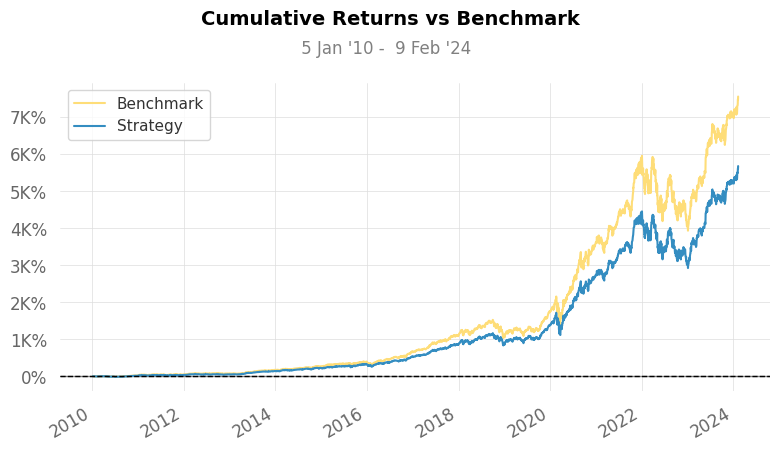

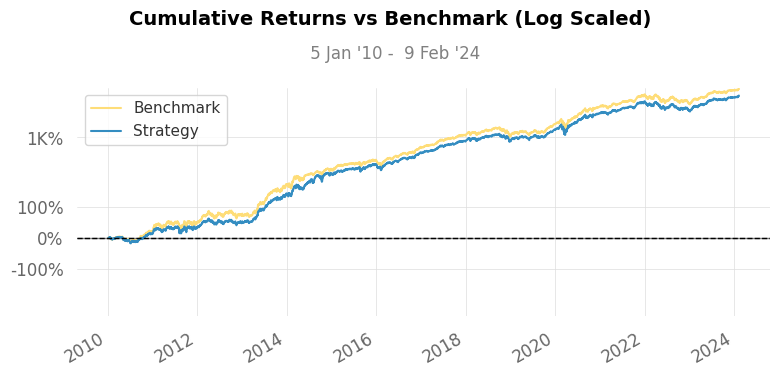

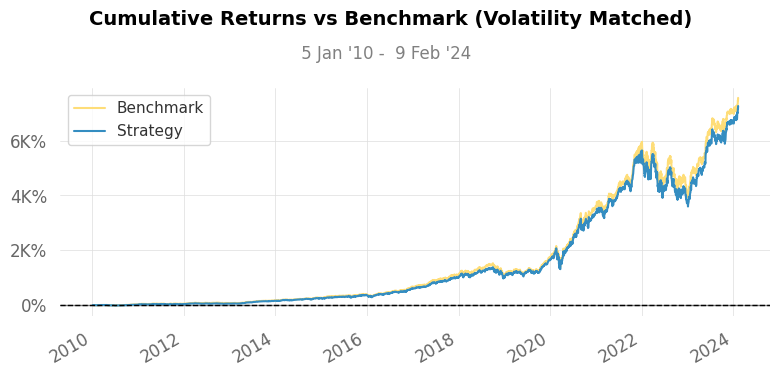

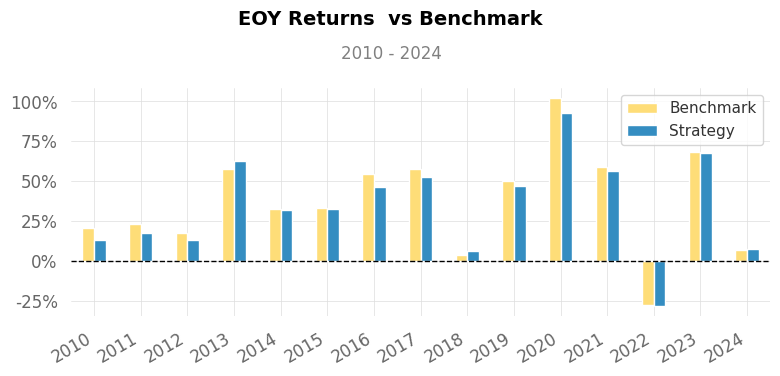

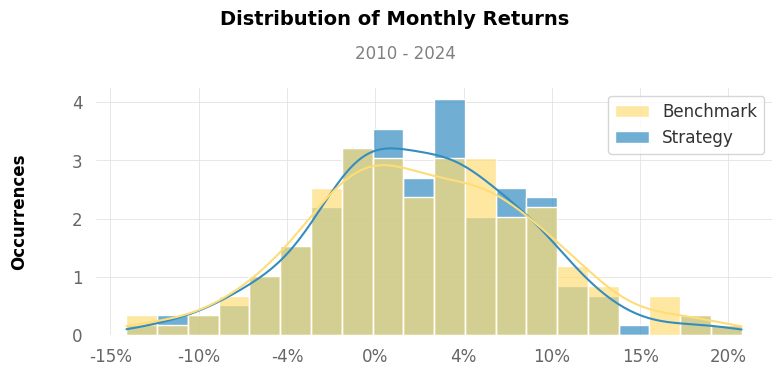

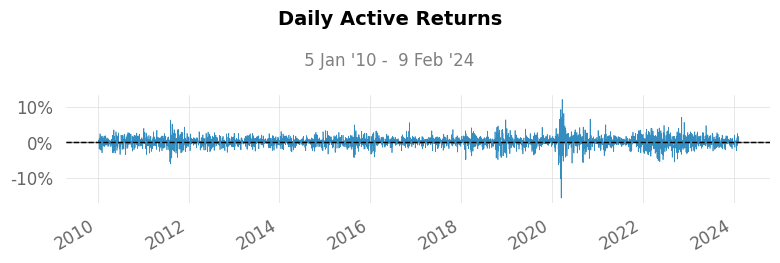

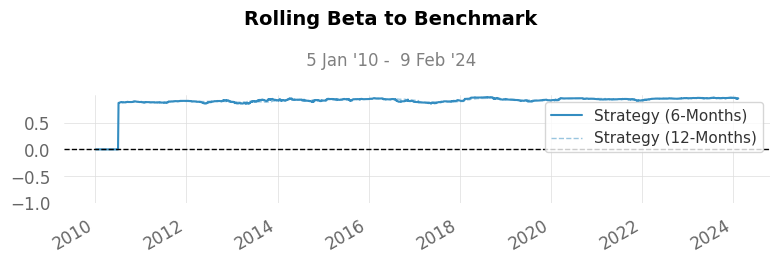

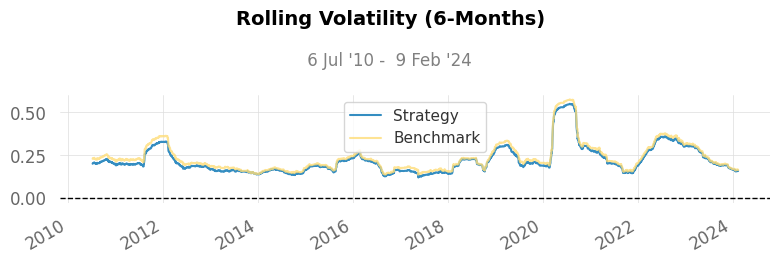

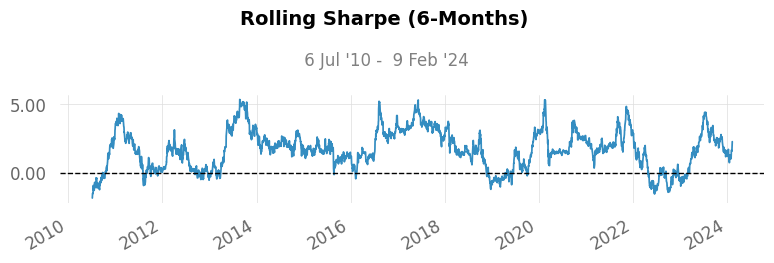

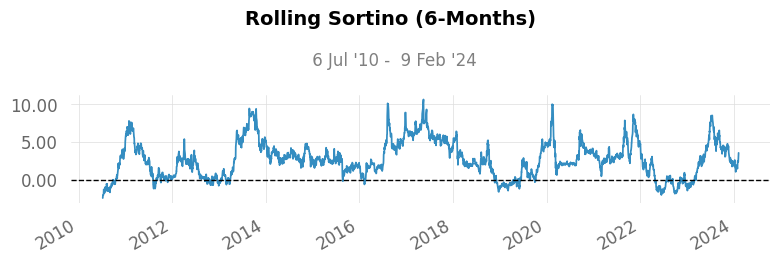

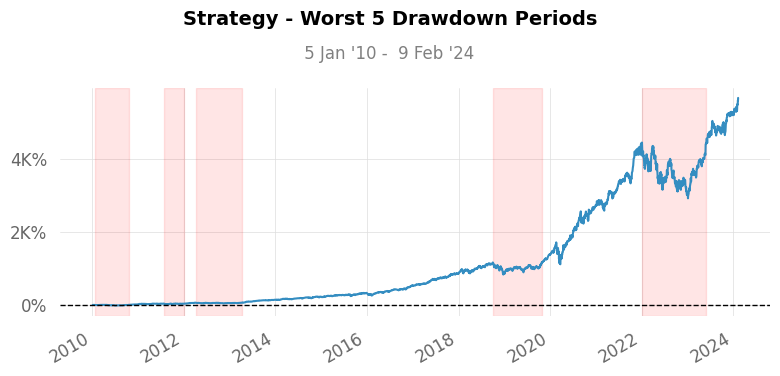

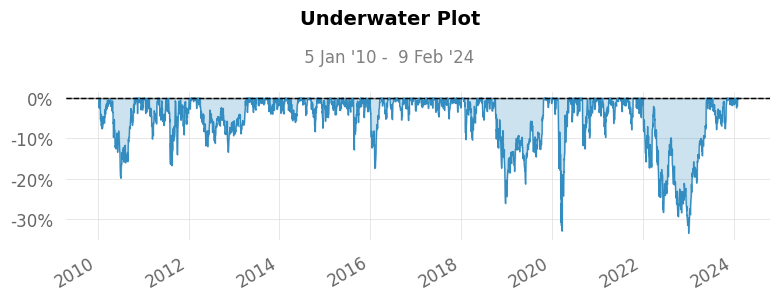

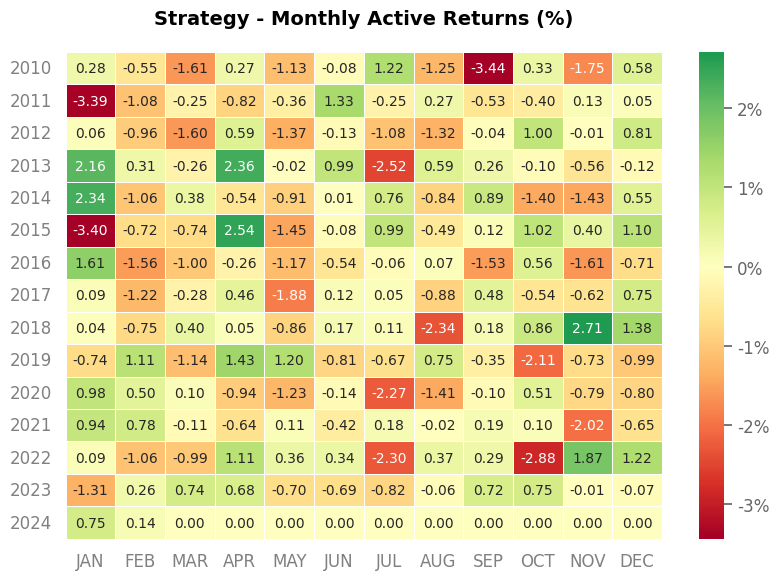

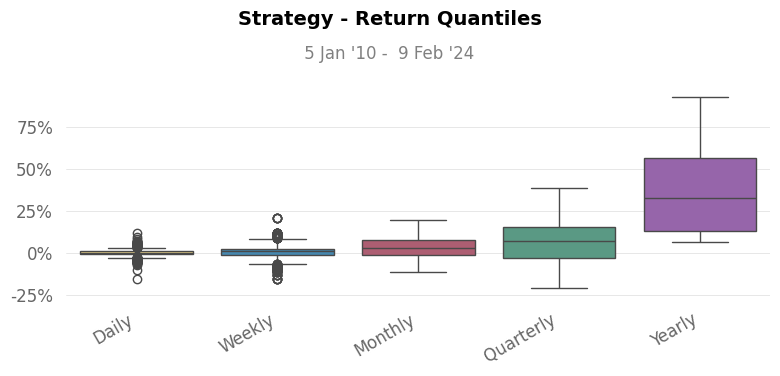

In [41]:
qs.reports.full(normal1_optimized_portfolio, benchmark=optimized_portfolio)


[Performance Metrics]

                           Benchmark    Strategy
-------------------------  -----------  ----------
Start Period               2010-01-05   2010-01-05
End Period                 2024-02-09   2024-02-09
Risk-Free Rate             0.0%         0.0%
Time in Market             100.0%       100.0%

Cumulative Return          7,553.65%    14,818.45%
CAGR﹪                     23.66%       27.76%

Sharpe                     1.37         1.35
Prob. Sharpe Ratio         100.0%       100.0%
Smart Sharpe               1.24         1.23
Sortino                    2.01         1.98
Smart Sortino              1.83         1.8
Sortino/√2                 1.42         1.4
Smart Sortino/√2           1.29         1.27
Omega                      1.27         1.27

Max Drawdown               -34.5%       -41.41%
Longest DD Days            508          521
Volatility (ann.)          24.82%       29.52%
R^2                        0.98         0.98
Information Ratio          0.06        

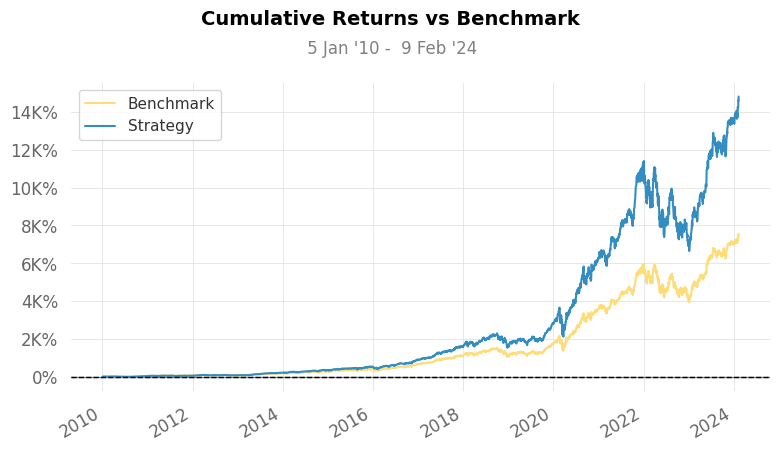

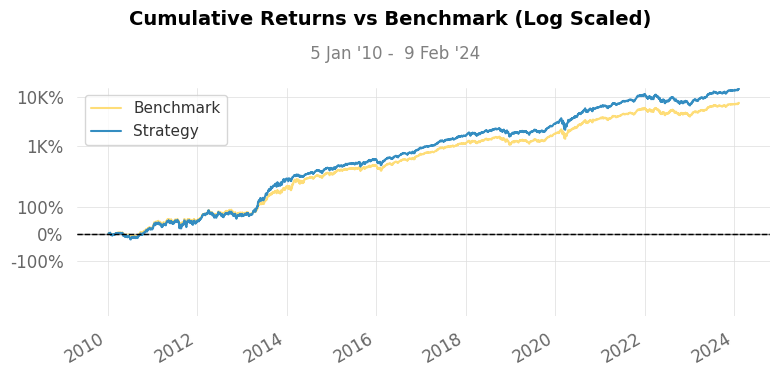

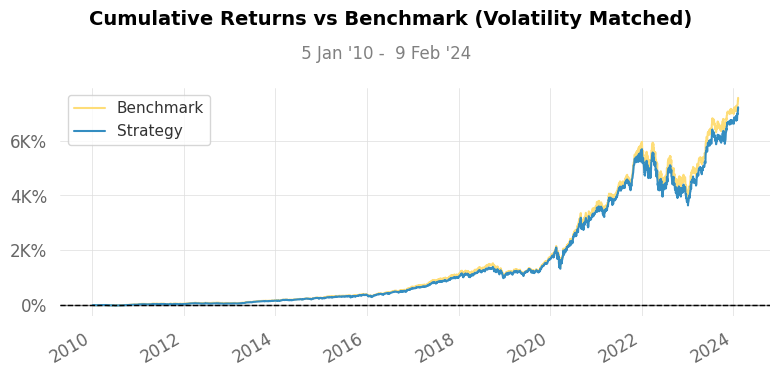

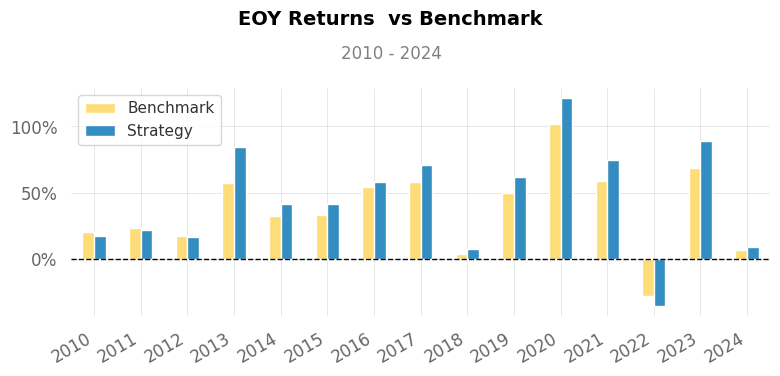

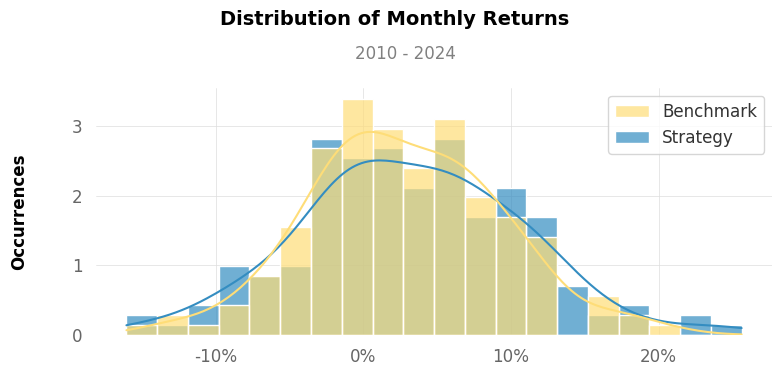

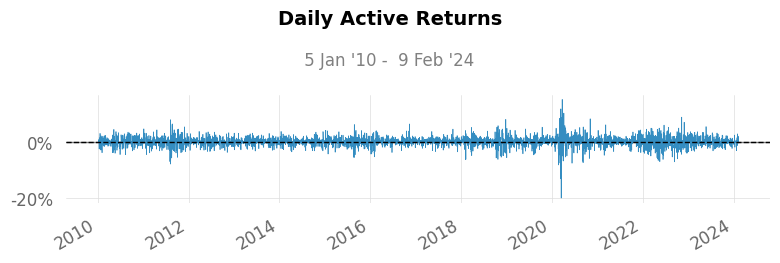

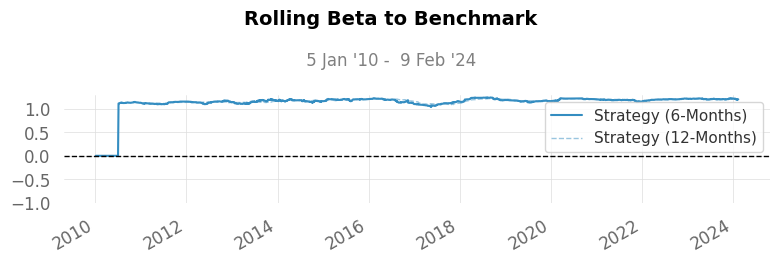

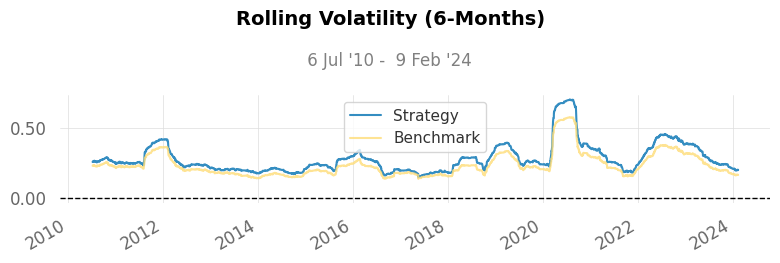

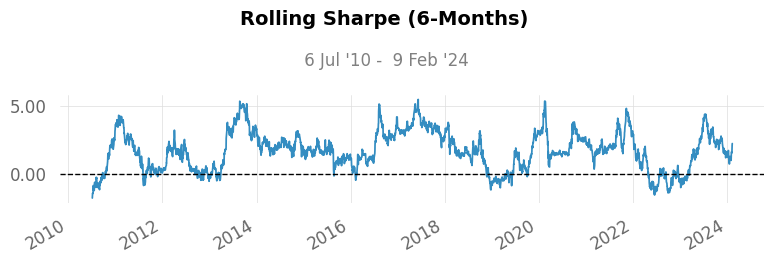

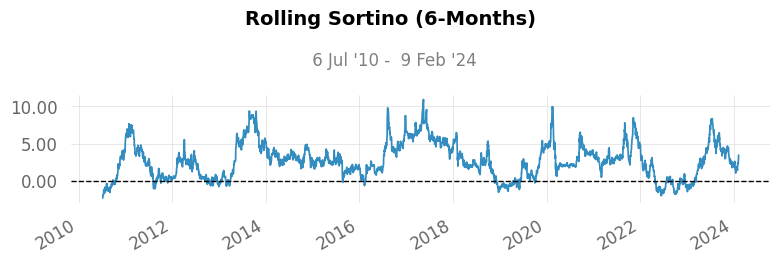

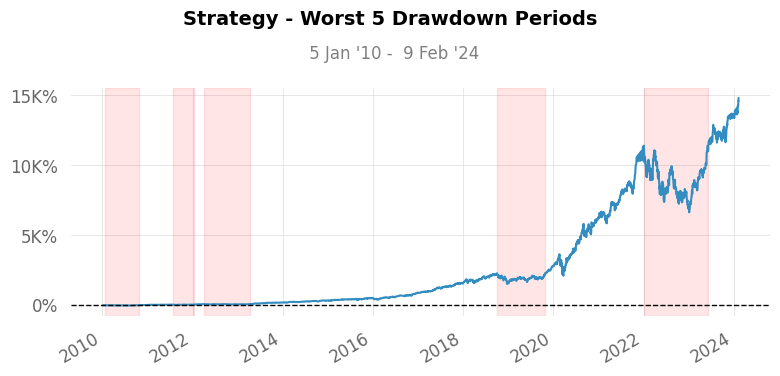

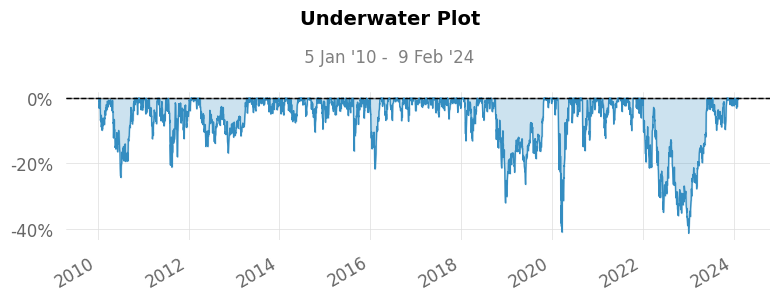

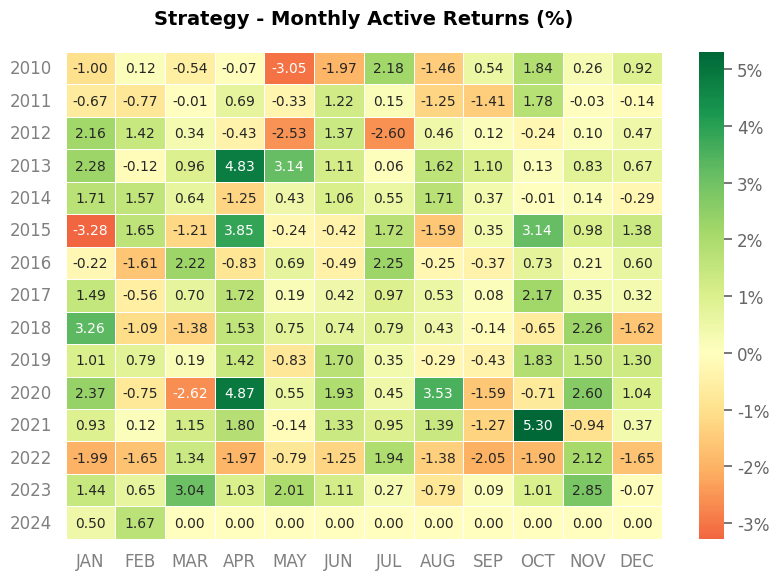

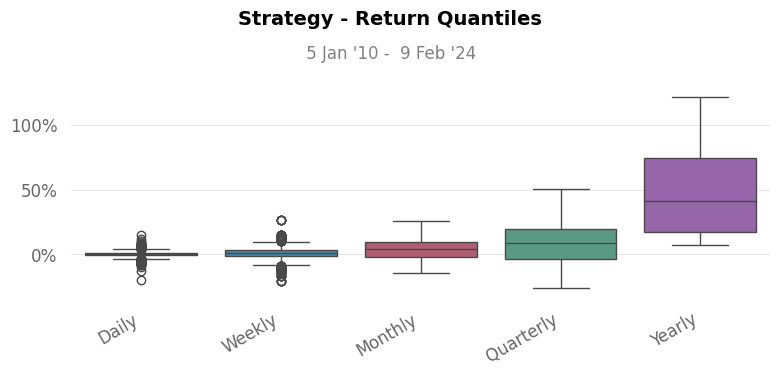

In [42]:
qs.reports.full(normal2_optimized_portfolio, benchmark=optimized_portfolio)

[Performance Metrics]



                           Benchmark    Strategy
-------------------------  -----------  ----------
Start Period               2010-01-05   2010-01-05
End Period                 2024-02-09   2024-02-09
Risk-Free Rate             0.0%         0.0%
Time in Market             100.0%       100.0%

Cumulative Return          7,553.65%    8,146.11%
CAGR﹪                     23.66%       24.11%

Sharpe                     1.37         1.35
Prob. Sharpe Ratio         100.0%       100.0%
Smart Sharpe               1.24         1.23
Sortino                    2.01         1.98
Smart Sortino              1.83         1.8
Sortino/√2                 1.42         1.4
Smart Sortino/√2           1.29         1.27
Omega                      1.27         1.27

Max Drawdown               -34.5%       -36.18%
Longest DD Days            508          513
Volatility (ann.)          24.82%       25.58%
R^2                        0.98         0.98
Information Ratio          0.01         0.01
Calmar            

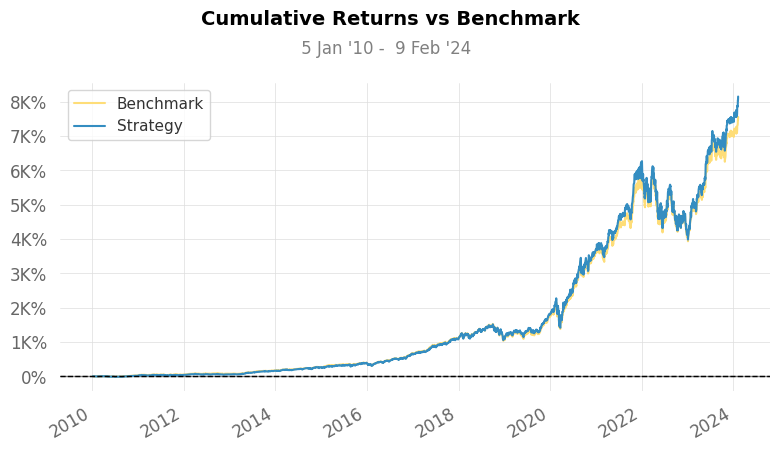

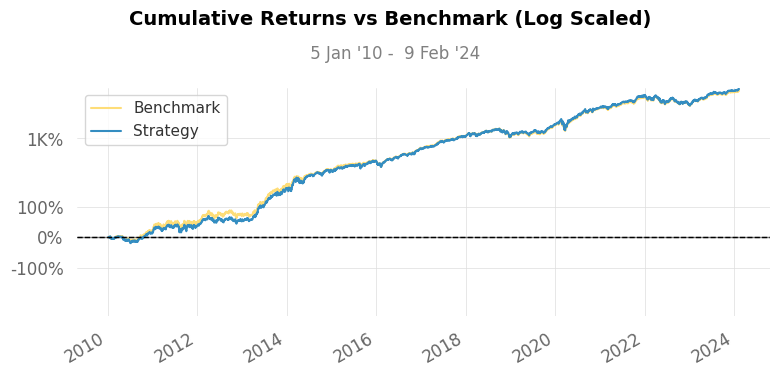

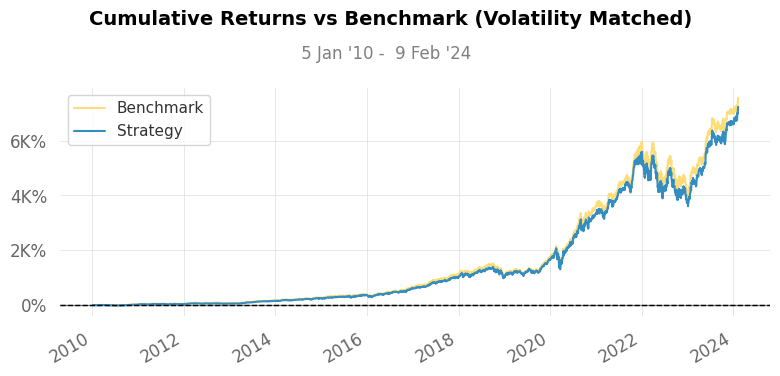

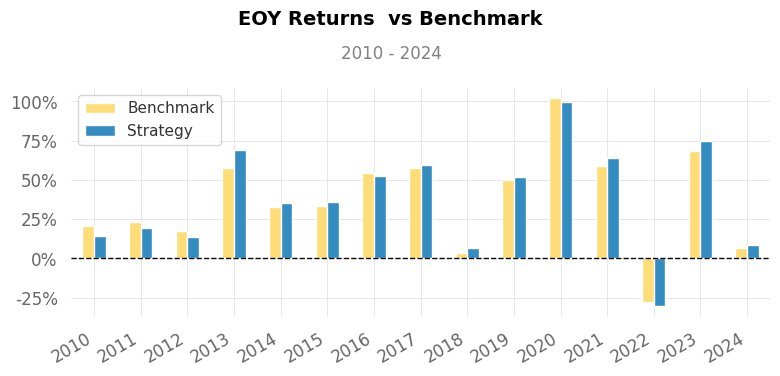

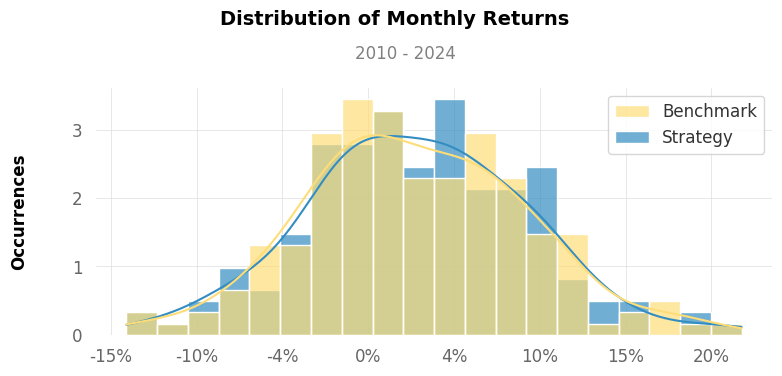

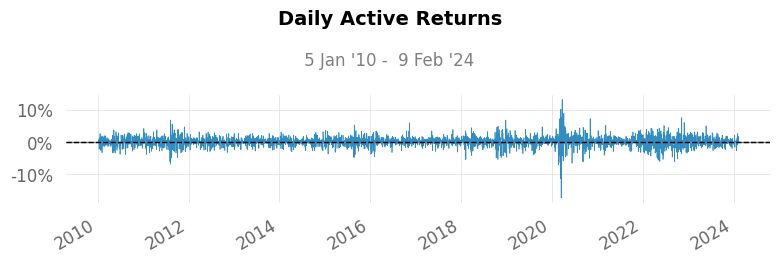

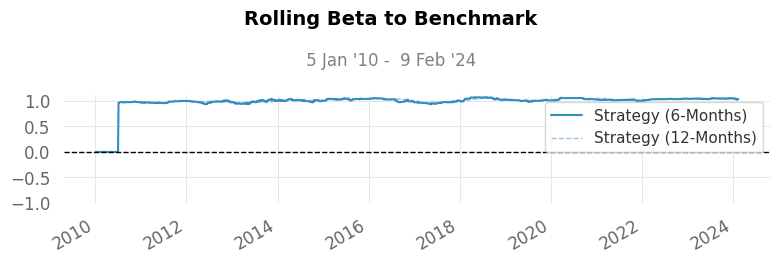

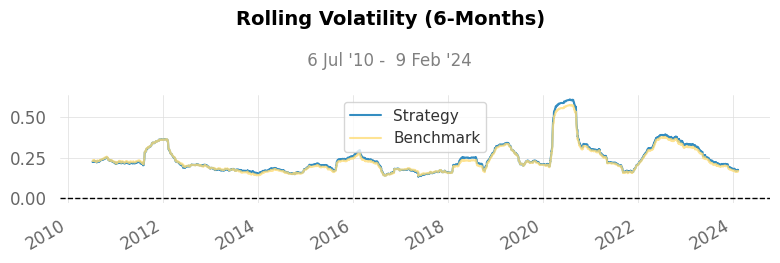

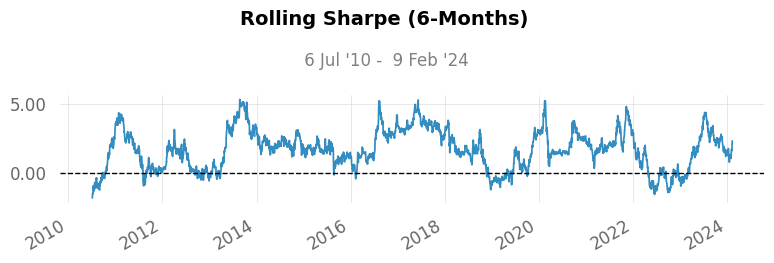

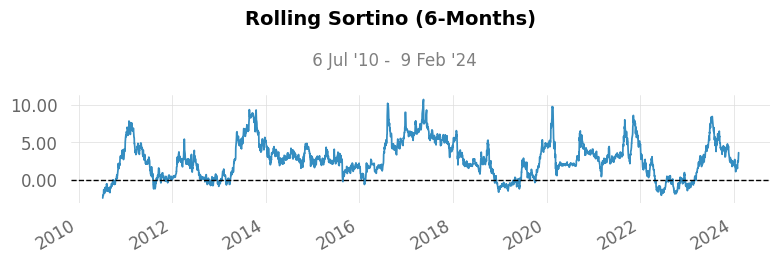

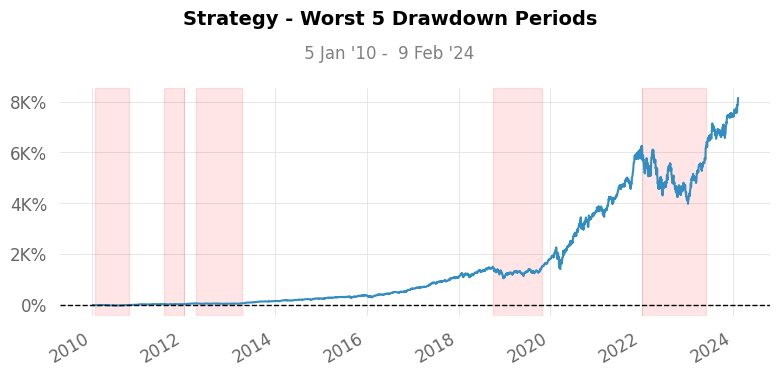

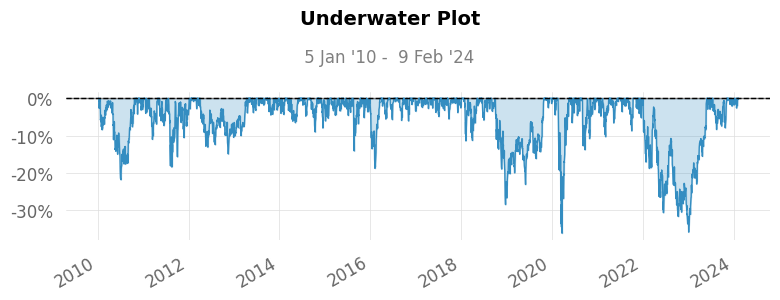

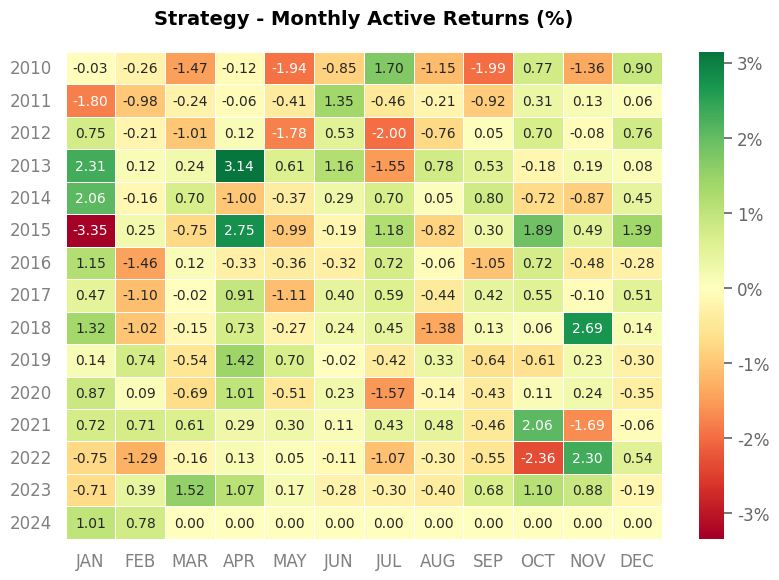

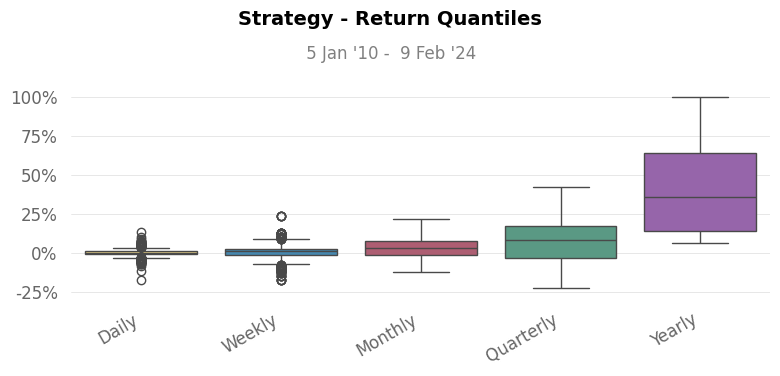

In [43]:
qs.reports.full(mutation1_optimized_portfolio, benchmark=optimized_portfolio)

[Performance Metrics]

                           Benchmark    Strategy
-------------------------  -----------  ----------
Start Period               2010-01-05   2010-01-05
End Period                 2024-02-09   2024-02-09
Risk-Free Rate             0.0%         0.0%
Time in Market             100.0%       100.0%

Cumulative Return          7,553.65%    5,487.04%
CAGR﹪                     23.66%       21.77%

Sharpe                     1.37         1.35
Prob. Sharpe Ratio         100.0%       100.0%
Smart Sharpe               1.24         1.23
Sortino                    2.01         1.98
Smart Sortino              1.82         1.8
Sortino/√2                 1.42         1.4
Smart Sortino/√2           1.29         1.27
Omega                      1.27         1.27

Max Drawdown               -34.5%       -32.89%
Longest DD Days            508          507
Volatility (ann.)          24.82%       23.11%
R^2                        0.98         0.98
Information Ratio          -0.05        

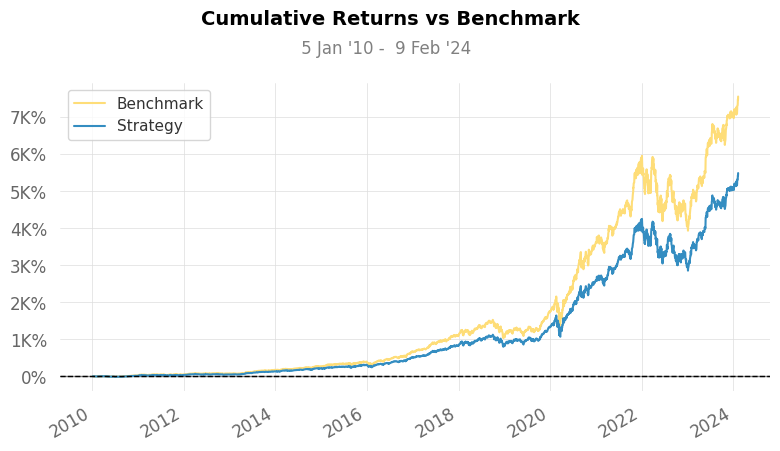

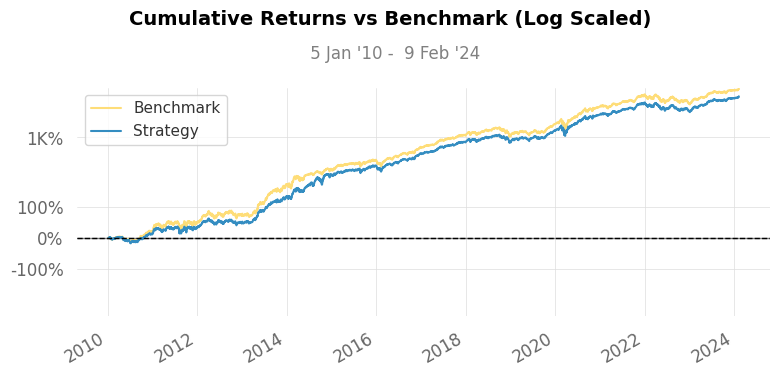

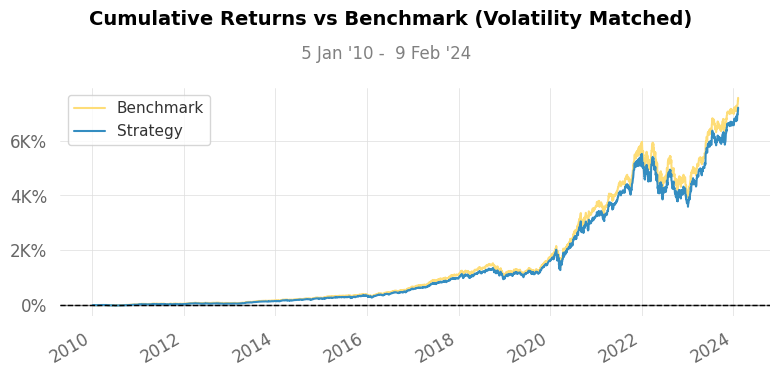

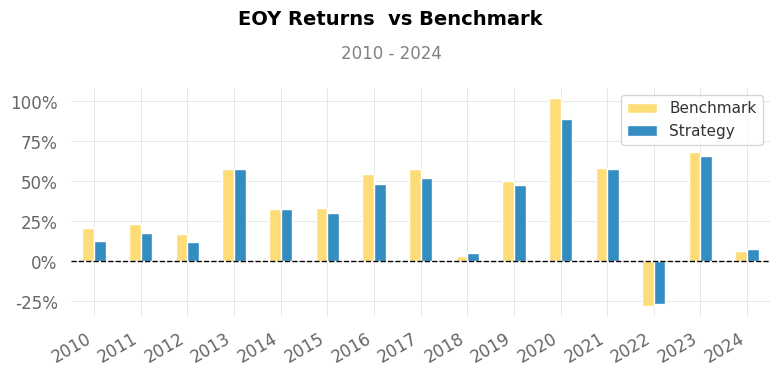

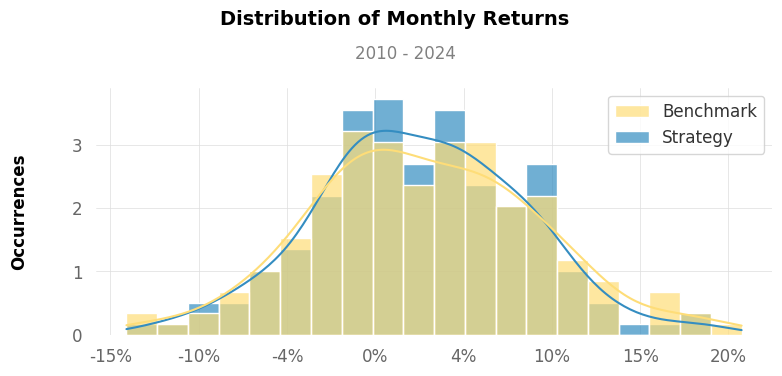

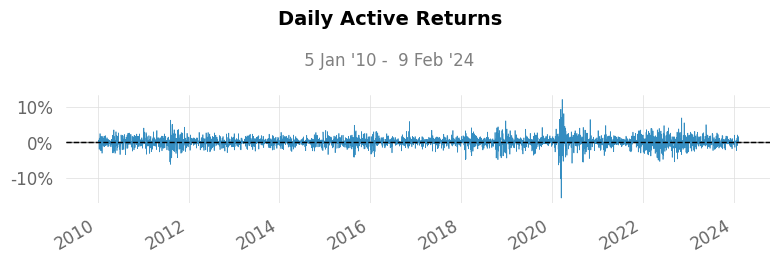

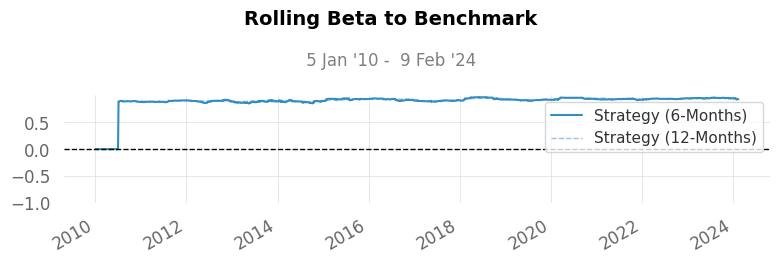

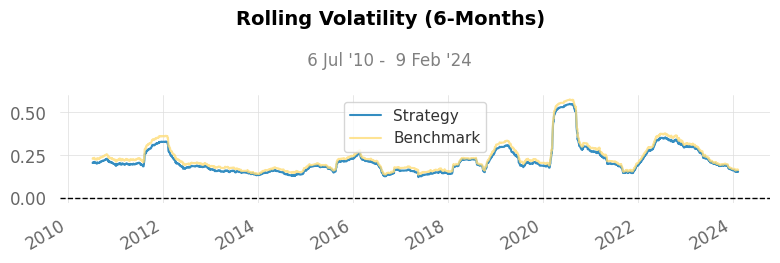

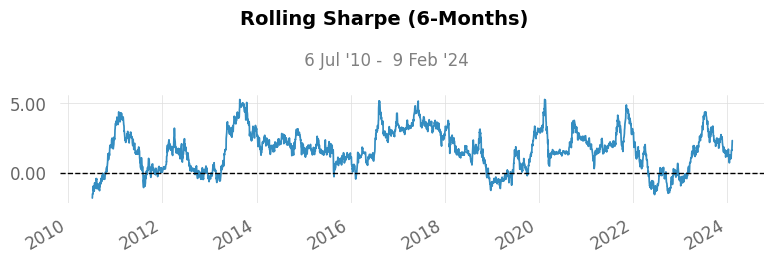

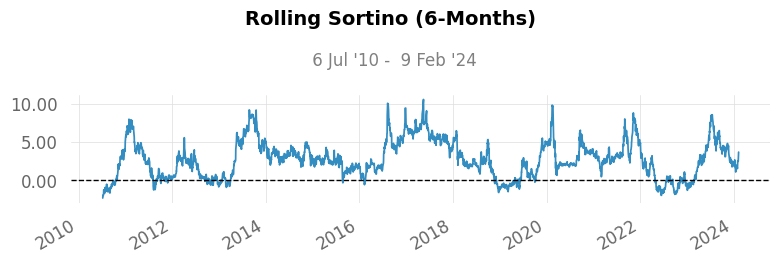

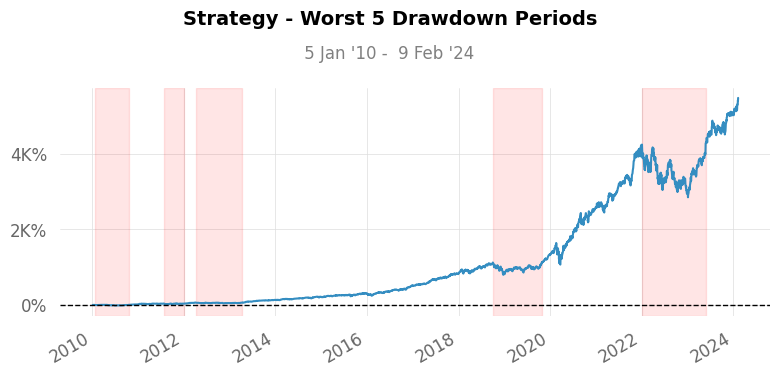

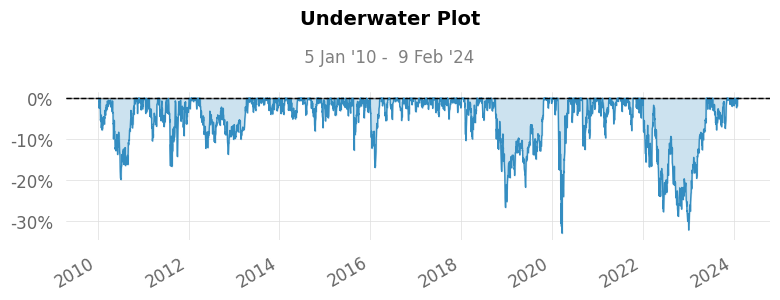

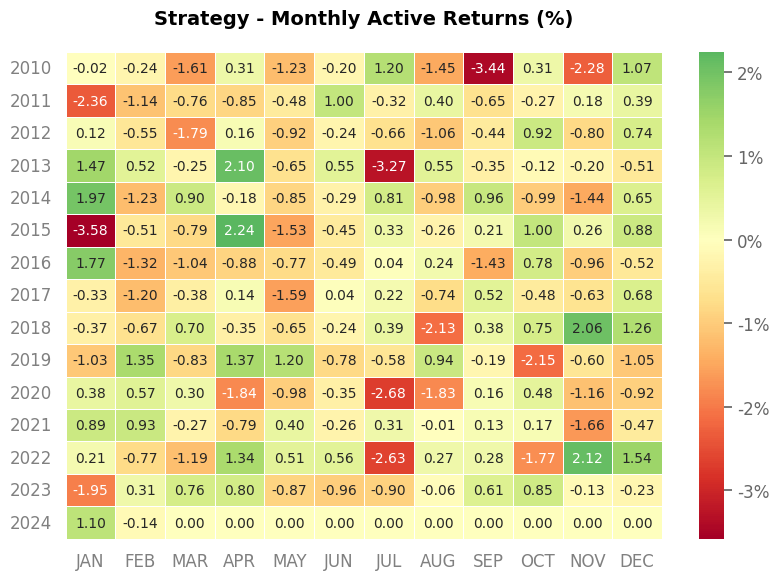

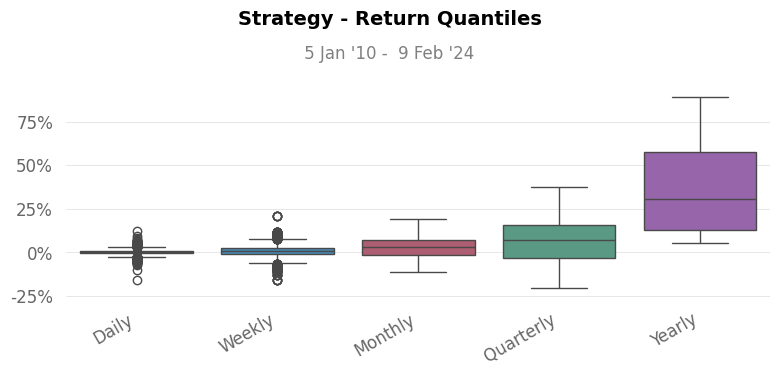

In [44]:
qs.reports.full(mutation2_optimized_portfolio, benchmark=optimized_portfolio)

[Performance Metrics]



                           Benchmark    Strategy
-------------------------  -----------  ----------
Start Period               2010-01-05   2010-01-05
End Period                 2024-02-09   2024-02-09
Risk-Free Rate             0.0%         0.0%
Time in Market             100.0%       100.0%

Cumulative Return          7,553.65%    5,657.36%
CAGR﹪                     23.66%       21.95%

Sharpe                     1.37         1.35
Prob. Sharpe Ratio         100.0%       100.0%
Smart Sharpe               1.24         1.23
Sortino                    2.01         1.98
Smart Sortino              1.83         1.81
Sortino/√2                 1.42         1.4
Smart Sortino/√2           1.29         1.28
Omega                      1.27         1.27

Max Drawdown               -34.5%       -33.36%
Longest DD Days            508          513
Volatility (ann.)          24.82%       23.26%
R^2                        0.98         0.98
Information Ratio          -0.04        -0.04
Calmar          

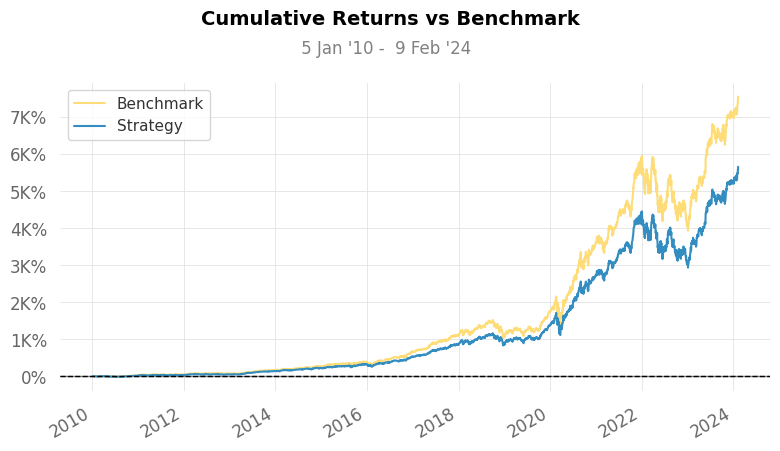

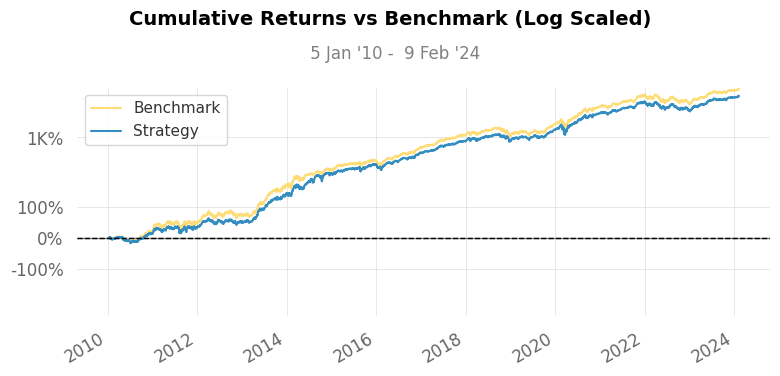

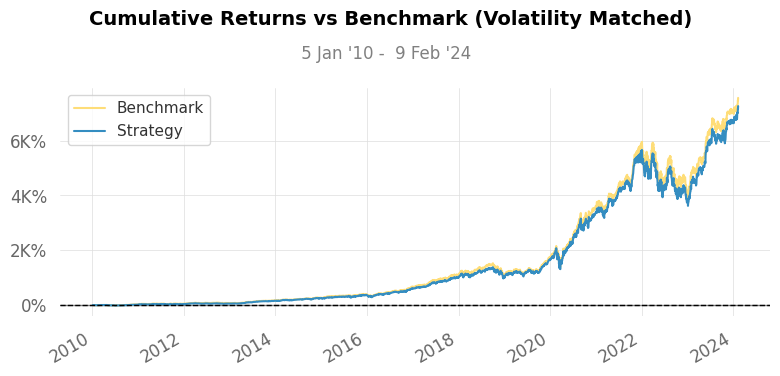

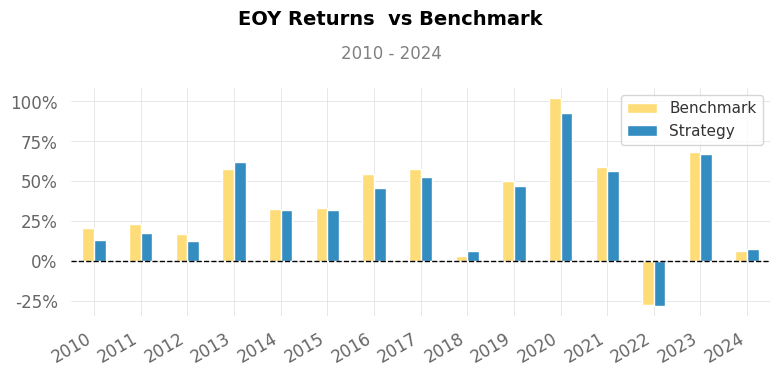

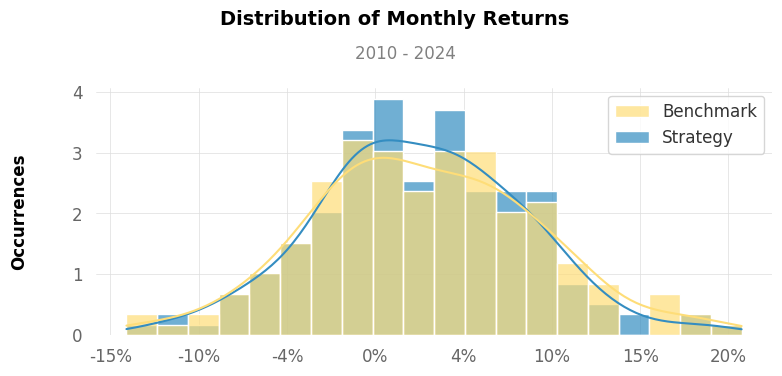

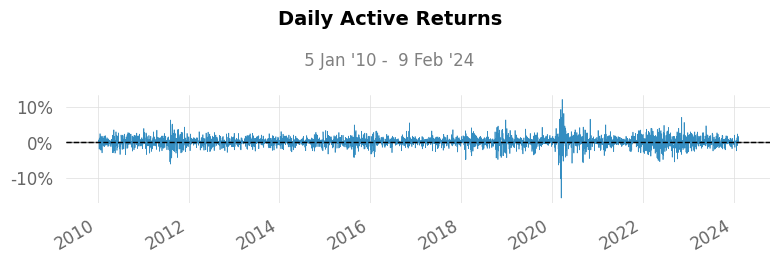

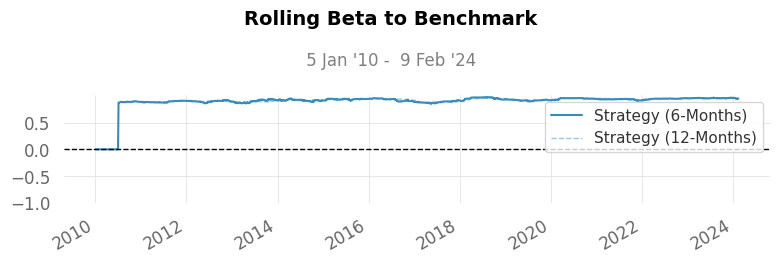

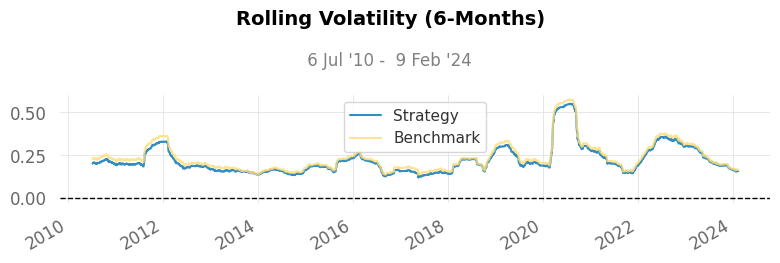

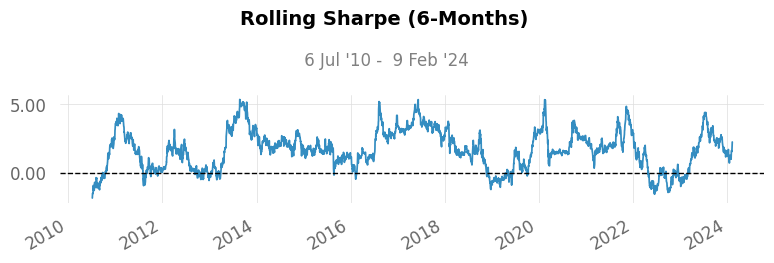

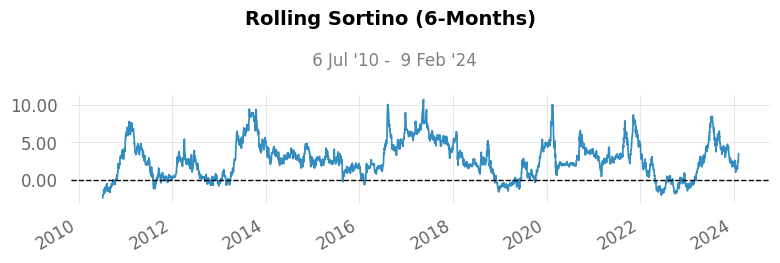

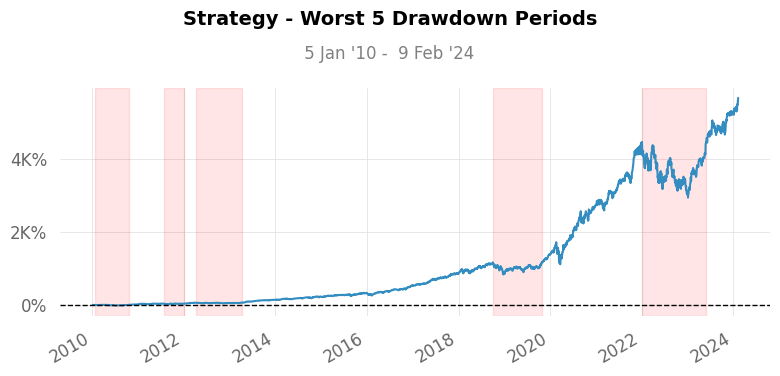

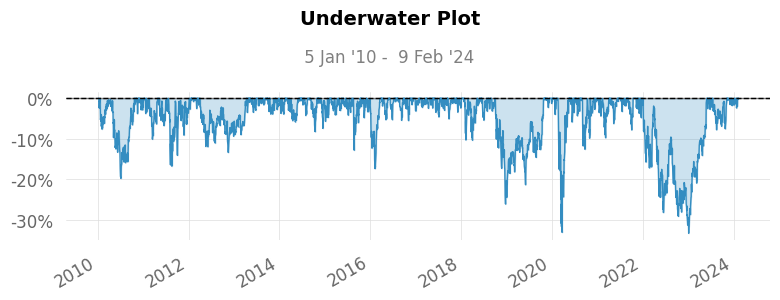

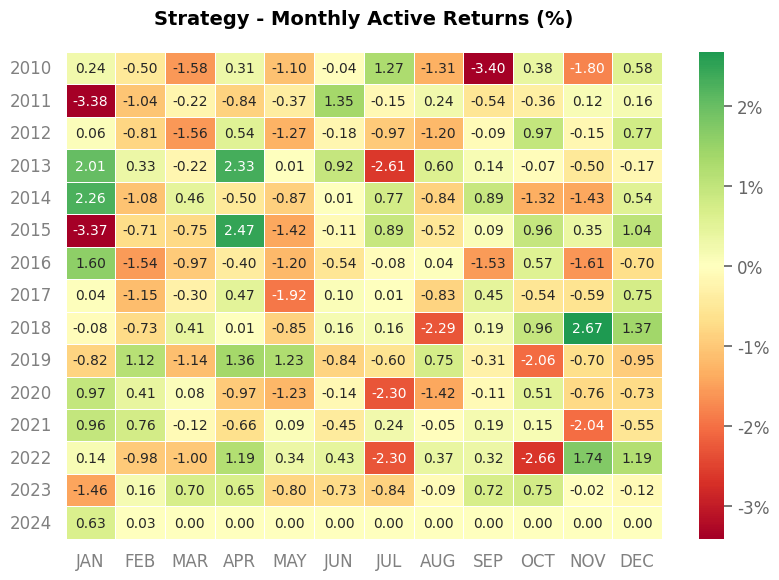

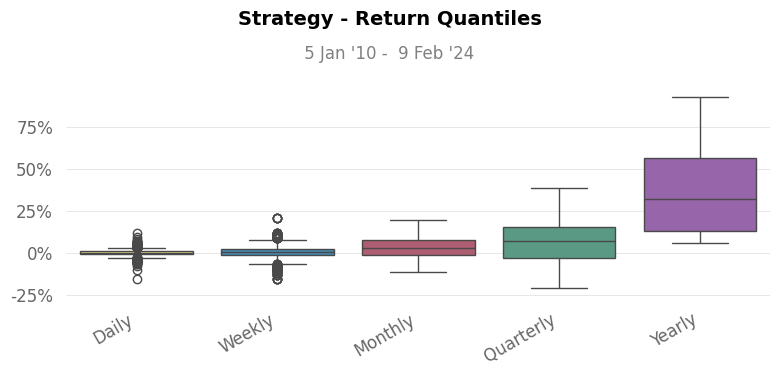

In [45]:
qs.reports.full(elite1_optimized_portfolio, benchmark=optimized_portfolio)

[Performance Metrics]



                           Benchmark    Strategy
-------------------------  -----------  ----------
Start Period               2010-01-05   2010-01-05
End Period                 2024-02-09   2024-02-09
Risk-Free Rate             0.0%         0.0%
Time in Market             100.0%       100.0%

Cumulative Return          7,553.65%    14,818.45%
CAGR﹪                     23.66%       27.76%

Sharpe                     1.37         1.35
Prob. Sharpe Ratio         100.0%       100.0%
Smart Sharpe               1.24         1.23
Sortino                    2.01         1.98
Smart Sortino              1.83         1.8
Sortino/√2                 1.42         1.4
Smart Sortino/√2           1.29         1.27
Omega                      1.27         1.27

Max Drawdown               -34.5%       -41.41%
Longest DD Days            508          521
Volatility (ann.)          24.82%       29.52%
R^2                        0.98         0.98
Information Ratio          0.06         0.06
Calmar           

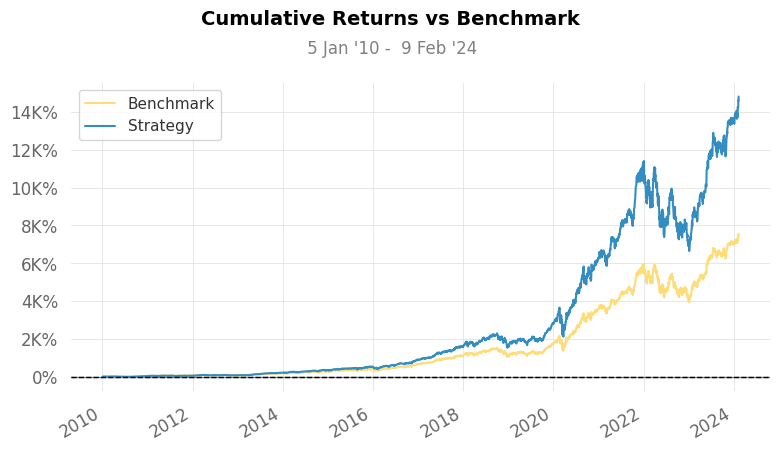

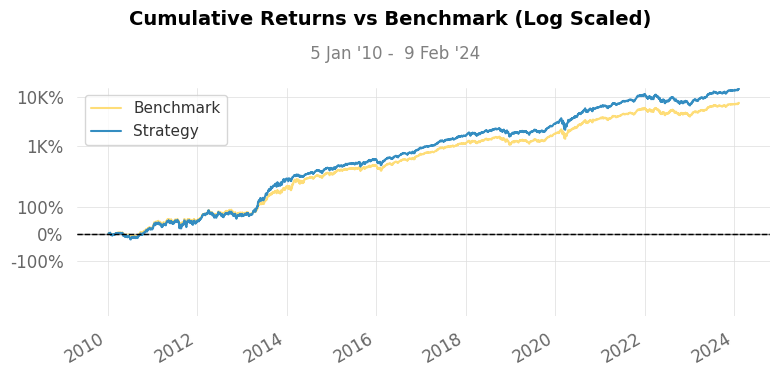

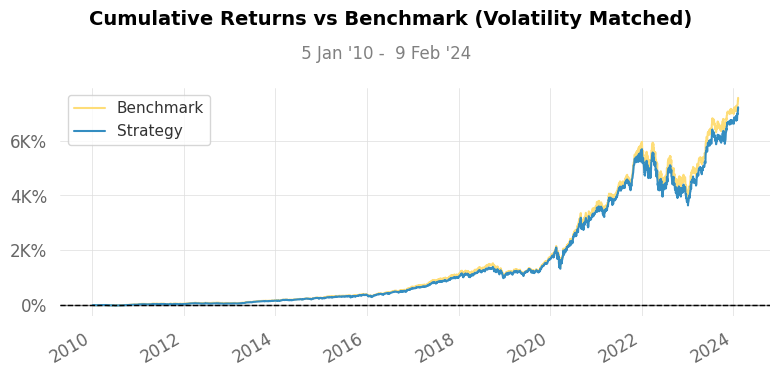

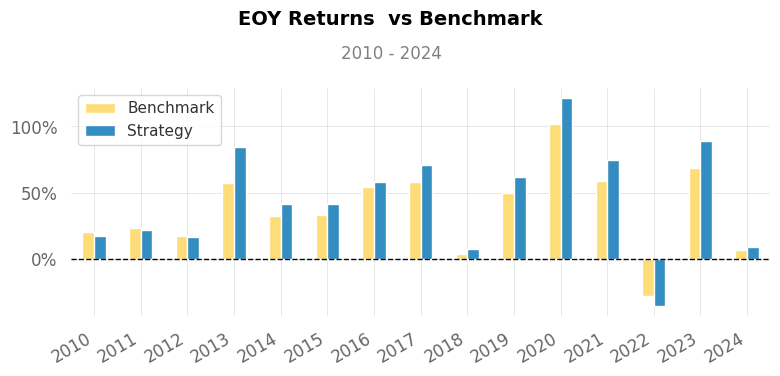

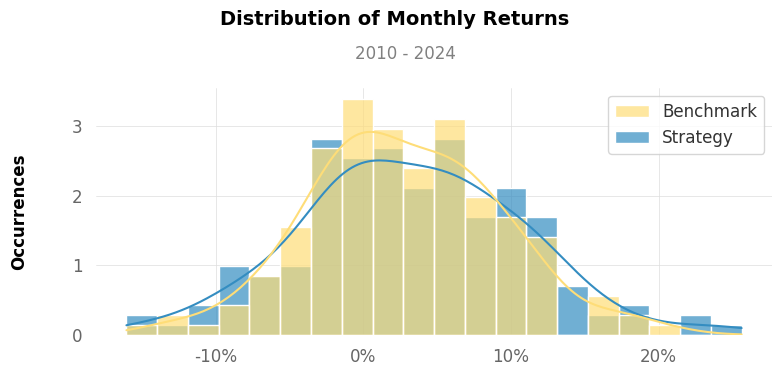

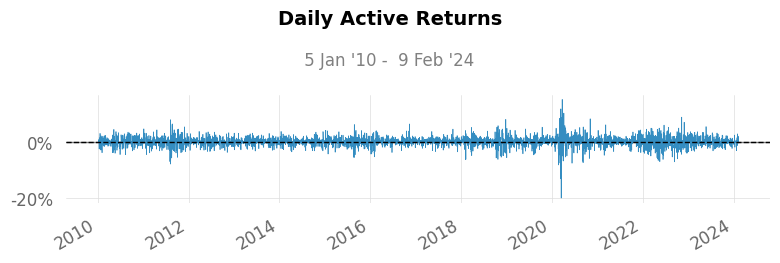

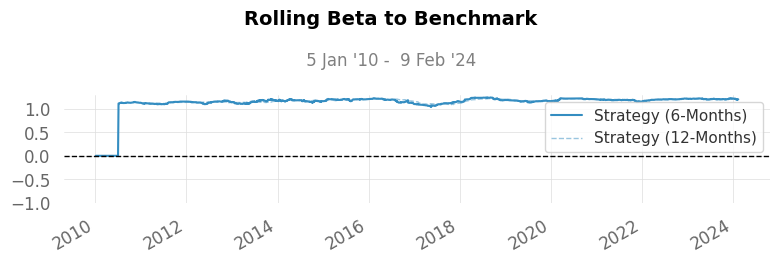

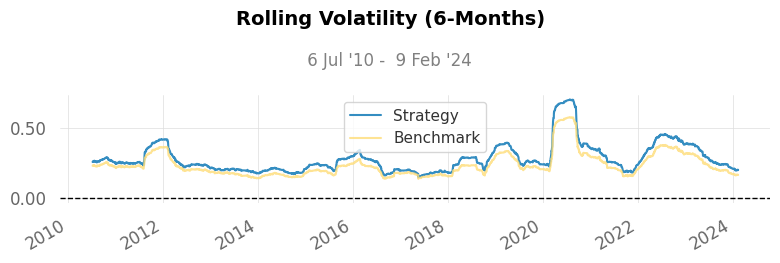

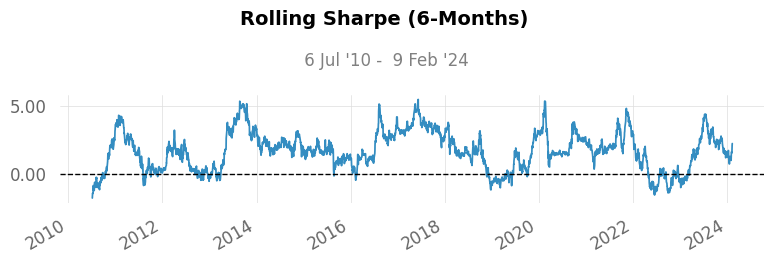

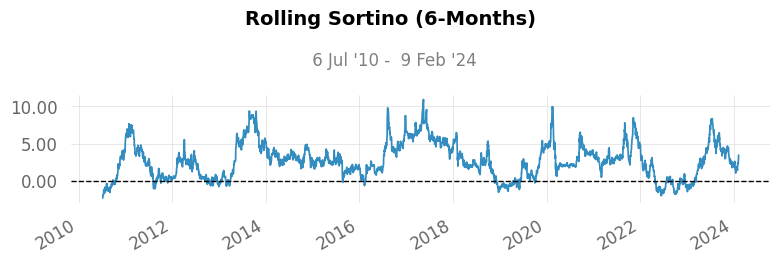

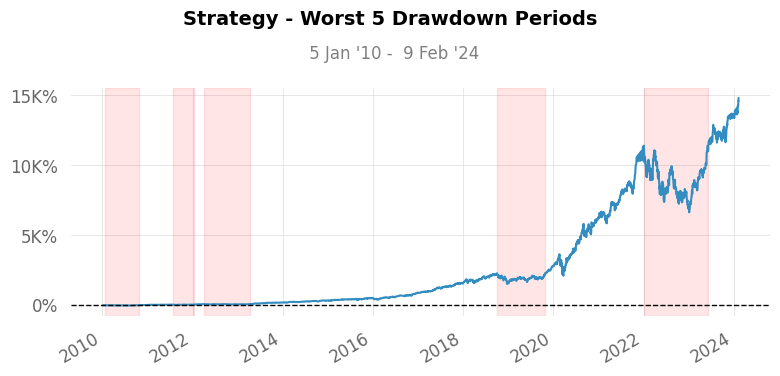

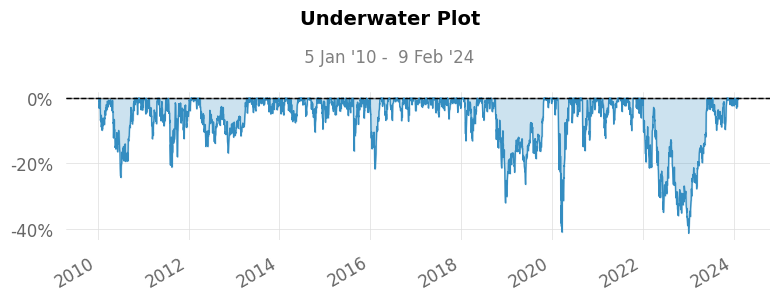

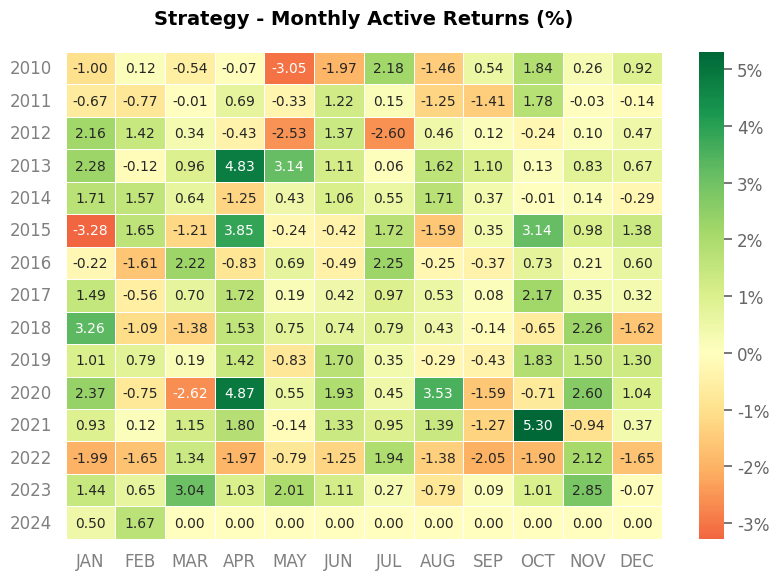

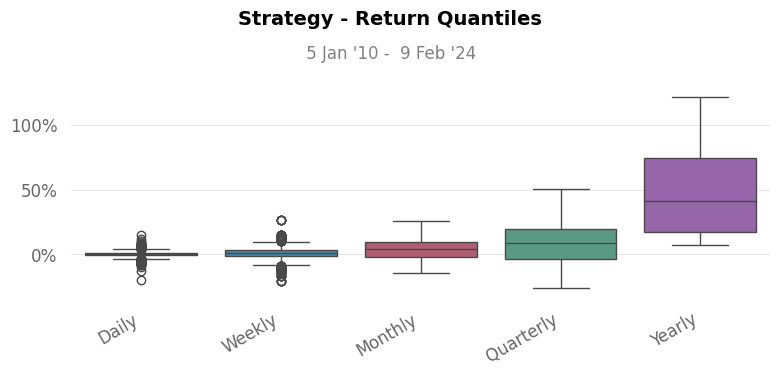

In [46]:
qs.reports.full(elite2_optimized_portfolio, benchmark=optimized_portfolio)